# Document setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Manipulation functions

**Reverse** will reverse the ranking scale (so 5 → 1, 2 → 4, etc.); applied to negative questions

**Adjust** will replace the string answer options with a ranking scale 1-5, will drop unecessary columns, reverse negative questions and rename the row indices to the participants' names for easier comparison

There are two significant outliers, that have been ruled out.

In [2]:
def reverse(s):
    out = [10 - int(item) for item in s]
    return out

# Data evaluation

In [4]:
columns = {
    "I would normally say my most dominant player type is" : "S0",

    "ID1" : "Q100",
    "The experience ended by" : "Q101",
    "Please state why you chose to stop the experience" : "Q102",
    "Please elaborate why" : "Q103",
    "During the experience I was thinking about" : "Q104",
    "I can imagine the protagonist, Res, discovering" : "Q105",
    "Res is on a journey to become a fully operational robot" : "Q106",
    "Res has a lot of friends" : "Q107",
    "Res is on a journey to discover what happened in the past" : "Q108",
    "How did you feel for Res throughout the experience?" : "Q109",
    "How did you feel throughout the experience?" : "Q110",
    "I played this mostly using the following player type" : "Q111",
    "Please indicate how much you wanted to continue during the experience" : "Q112",
    "Please describe why you picked that point on the scale above" : "Q113",

    "ID2" : "Q200",
    "The experience ended by.1" : "Q201",
    "Please state why you chose to stop the experience.1" : "Q202",
    "Please elaborate why.1" : "Q203",
    "During the experience I was thinking about.1" : "Q204",
    "I can imagine the protagonist, Res, discovering.1" : "Q205",
    " Res is on a journey to become a fully operational robot" : "Q206",
    "Res has a lot of friends.1" : "Q207",
    "Res is on a journey to discover what happened in the past.1" : "Q208",
    "How did you feel for Res throughout the experience?.1" : "Q209",
    "How did you feel throughout the experience?.1" : "Q210",
    "I played this mostly using the following player type.1" : "Q211",
    "Please indicate how much you wanted to continue during the experience.1" : "Q212",
    "Please describe why you picked that point on the scale above.1" : "Q213"
}

def retrieve(*args):
    return sorted(list(args[0].intersection(*args)))


numeric = {"Q104", "Q105", "Q106", "Q107", "Q108", "Q109", "Q110", "Q112", "Q204", "Q205", "Q206", "Q207", "Q208", "Q209", "Q210", "Q212"}
inversed = ["Q106", "Q107", "Q206", "Q207"]
first = set([question for question in columns.values() if question.startswith("Q1")])
second = set([question for question in columns.values() if question.startswith("Q2")])

In [6]:
responses = pd.read_excel("SEM5 Testing Responses.xlsx")

responses = responses.drop(columns=["Timestamp", "Consent", "I hereby give consent", "Unnamed: 28", "Unnamed: 31", "Unnamed: 34"]
                    ).drop(index=0
                    ).rename(columns=columns)[columns.values()]

responses[inversed] = responses[inversed].apply(reverse)


res_L_first = responses.loc[responses["Q100"].str.startswith("L")]
res_A_first = responses.loc[responses["Q100"].str.startswith("A")]

In [7]:
boxprops = dict(color="#3DB1E5", lw=2)
flierprops = dict(marker='o', markerfacecolor='#D1D2D4', linestyle='none')
medianprops = dict(lw=2, color="#E78E26")

boxplot_settings = {
       "rot" : 45,
       "boxprops" : boxprops,
       "flierprops" : flierprops,
       "medianprops" : medianprops,
       "color" : {'medians': '#E78E26',
                  'boxes': '#3DB1E5'}}

# Within group results
## Condition 1 (Linear first, then adaptive)

In [8]:
comparison_columns = ["Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q12"]

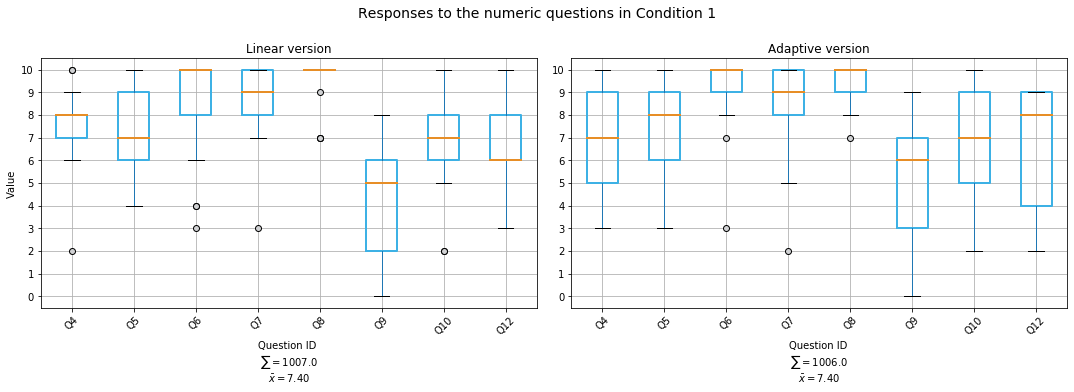

In [9]:
first_run = res_L_first[retrieve(numeric, first)].rename(columns=dict(zip(retrieve(numeric, first), comparison_columns)))
second_run = res_L_first[retrieve(numeric, second)].rename(columns=dict(zip(retrieve(numeric, second), comparison_columns)))

fig, axes = plt.subplots(1, 2, figsize = (15, 5.5))

LINE = first_run.boxplot(**boxplot_settings, ax=axes.flatten()[0])
ADAP = second_run.boxplot(**boxplot_settings, ax=axes.flatten()[1])

LINE_stats = r"$\sum = $" + str(sum(first_run.sum())) + "\n" + r"$\bar{x} = $" + "{:.2f}".format(np.mean(first_run.mean()))
ADAP_stats = r"$\sum = $" + str(sum(second_run.sum())) + "\n" + r"$\bar{x} = $" + "{:.2f}".format(np.mean(second_run.mean()))

LINE.set(title="Linear version", xlabel=f"Question ID \n{LINE_stats}", ylabel="Value", yticks=np.arange(0,11,1))
ADAP.set(title="Adaptive version", xlabel=f"Question ID \n{ADAP_stats}", yticks=np.arange(0,11,1))

plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.85)
plt.suptitle("Responses to the numeric questions in Condition 1", size=14, weight="medium")
plt.show()

## Condition 2 (Adaptive first, then linear)

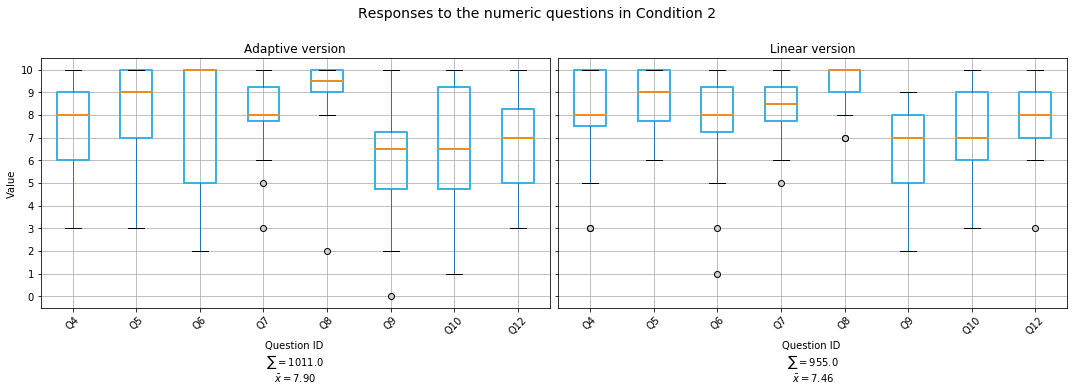

In [10]:
first_run = res_A_first[retrieve(numeric, first)].rename(columns=dict(zip(retrieve(numeric, first), comparison_columns)))
second_run = res_A_first[retrieve(numeric, second)].rename(columns=dict(zip(retrieve(numeric, second), comparison_columns)))

fig, axes = plt.subplots(1, 2, figsize = (15, 5.5), sharey=True)

ADAP = second_run.boxplot(**boxplot_settings, ax=axes.flatten()[0])
LINE = first_run.boxplot(**boxplot_settings, ax=axes.flatten()[1])

ADAP_stats = r"$\sum = $" + str(sum(first_run.sum())) + "\n" + r"$\bar{x} = $" + "{:.2f}".format(np.mean(first_run.mean()))
LINE_stats = r"$\sum = $" + str(sum(second_run.sum())) + "\n" + r"$\bar{x} = $" + "{:.2f}".format(np.mean(second_run.mean()))

LINE.set(title="Linear version", xlabel=f"Question ID \n{LINE_stats}", yticks=np.arange(0,11,1))
ADAP.set(title="Adaptive version", xlabel=f"Question ID \n{ADAP_stats}", ylabel="Value", yticks=np.arange(0,11,1))

plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.85)
plt.suptitle("Responses to the numeric questions in Condition 2", size=14, weight="medium")
plt.show()

## Combined conditions, by question

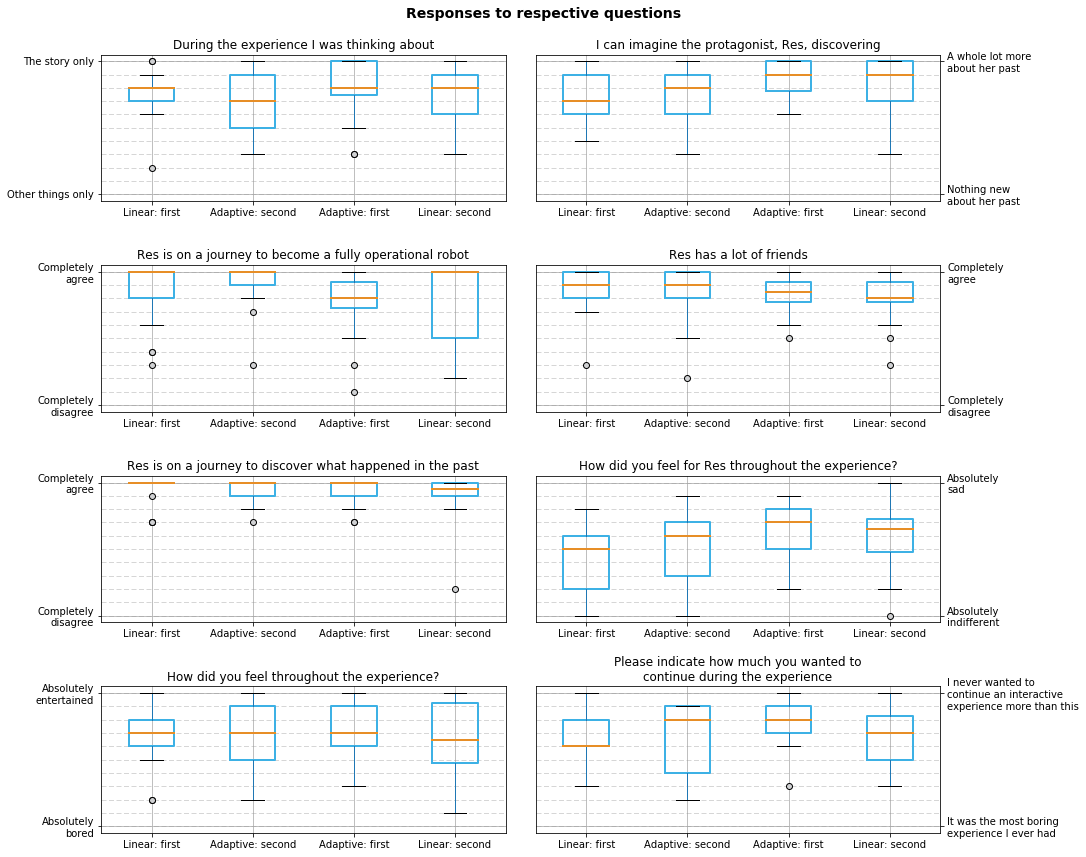

In [11]:
all_boxplot_questions = {
    "Q4" : "During the experience I was thinking about",
    "Q5" : "I can imagine the protagonist, Res, discovering",
    "Q6" : "Res is on a journey to become a fully operational robot",
    "Q7" : "Res has a lot of friends",
    "Q8" : "Res is on a journey to discover what happened in the past",
    "Q9" : "How did you feel for Res throughout the experience?",
    "Q10" : "How did you feel throughout the experience?",
    "Q12" : "Please indicate how much you wanted to\ncontinue during the experience"
}

all_boxplot_answers = {
    "Q4" : ["Other things only", "The story only"],
    "Q5" : ["Nothing new\nabout her past", "A whole lot more\nabout her past"],
    "Q6" : ["Completely\ndisagree", "Completely\nagree"],
    "Q7" : ["Completely\ndisagree", "Completely\nagree"],
    "Q8" : ["Completely\ndisagree", "Completely\nagree"],
    "Q9" : ["Absolutely\nindifferent", "Absolutely\nsad"],
    "Q10" : ["Absolutely\nbored", "Absolutely\nentertained"],
    "Q12" : ["It was the most boring\nexperience I ever had", "I never wanted to\ncontinue an interactive\nexperience more than this"]
}

questionBoxplots = []

for i in range(len(comparison_columns)):
    a = pd.DataFrame()
    a['C1L'] = res_L_first[retrieve(numeric, first)[i]].reset_index(drop=True)
    a['C1A'] = res_L_first[retrieve(numeric, second)[i]].reset_index(drop=True)
    a['C2A'] = res_A_first[retrieve(numeric, first)[i]].reset_index(drop=True)
    a['C2L'] = res_A_first[retrieve(numeric, second)[i]].reset_index(drop=True)
    questionBoxplots.append(a)

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15, 12))

for i in range(len(questionBoxplots)//2):
    for j in range(2):
        for k in range(11):
            axes[i][j].axhline(k, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)

        questionBoxplots[i*2+j].boxplot(**{**boxplot_settings, "rot" : 0}, ax=axes[i][j])
        
        axes[i][j].set(yticks=np.arange(0, 11, step=10), yticklabels=all_boxplot_answers[comparison_columns[i*2+j]])
        axes[i][j].set(xticklabels=["Linear: first", "Adaptive: second", "Adaptive: first", "Linear: second"])

        if j == 1: axes[i][j].tick_params(axis='y', left=False, right=True, labelleft=False, labelright=True)
        
        title = all_boxplot_questions[comparison_columns[i*2+j]]

        axes[i][j].set_title(title)
        plt.tight_layout(pad=0.4, w_pad=3, h_pad=2)

fig.suptitle("Responses to respective questions", size=14, weight="semibold")
plt.subplots_adjust(top=0.925)
fig.show()

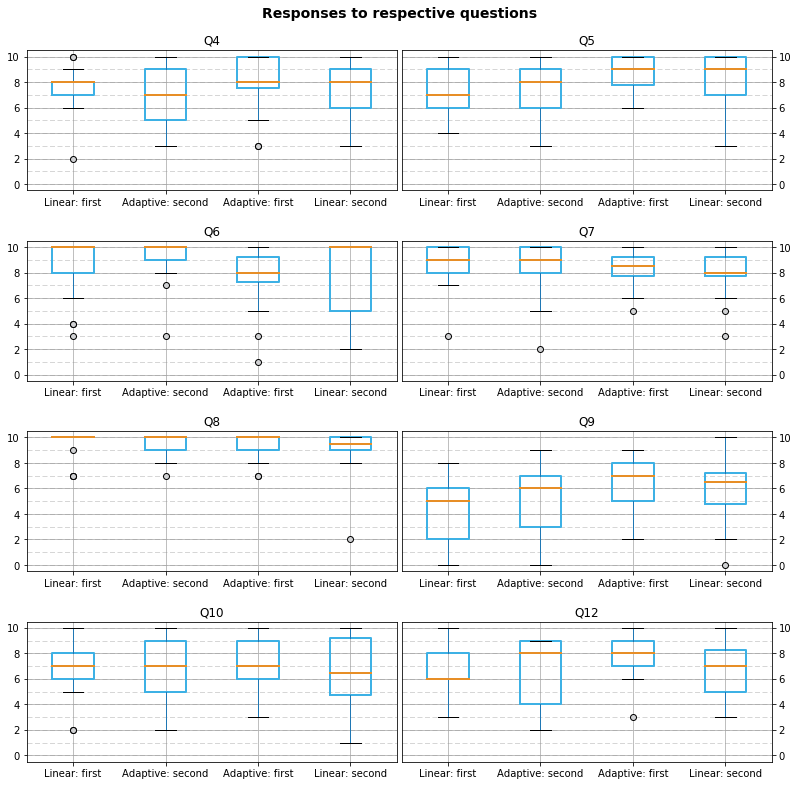

In [12]:
questionBoxplots = []

for i in range(len(comparison_columns)):
    a = pd.DataFrame()
    a['C1L'] = res_L_first[retrieve(numeric, first)[i]].reset_index(drop=True)
    a['C1A'] = res_L_first[retrieve(numeric, second)[i]].reset_index(drop=True)
    a['C2A'] = res_A_first[retrieve(numeric, first)[i]].reset_index(drop=True)
    a['C2L'] = res_A_first[retrieve(numeric, second)[i]].reset_index(drop=True)
    questionBoxplots.append(a)

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(11, 11))

for i in range(len(questionBoxplots)//2):
    for j in range(2):        
        for k in range(11):
            axes[i][j].axhline(k, dashes=[10, 5], alpha=0.8, color="#999999", lw=0.5)

        questionBoxplots[i*2+j].boxplot(**{**boxplot_settings, "rot" : 0}, ax=axes[i][j])
        
        axes[i][j].set(yticks=np.arange(0, 11, step=2))
        axes[i][j].set(xticklabels=["Linear: first", "Adaptive: second", "Adaptive: first", "Linear: second"])
        
        if j == 1: axes[i][j].tick_params(axis='y', left=False, right=True, labelleft=False, labelright=True)

        title = comparison_columns[i*2+j]

        axes[i][j].set_title(title)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2)

fig.suptitle("Responses to respective questions", size=14, weight="semibold")
plt.subplots_adjust(top=0.925)
fig.show()

In [13]:
FULL_LINEAR = pd.concat([
    res_L_first[retrieve(numeric, first)].rename(columns=dict(zip(retrieve(numeric, first), comparison_columns))),
    res_A_first[retrieve(numeric, second)].rename(columns=dict(zip(retrieve(numeric, second), comparison_columns)))])

FULL_ADAPTIVE = pd.concat([
    res_A_first[retrieve(numeric, first)].rename(columns=dict(zip(retrieve(numeric, first), comparison_columns))),
    res_L_first[retrieve(numeric, second)].rename(columns=dict(zip(retrieve(numeric, second), comparison_columns)))])

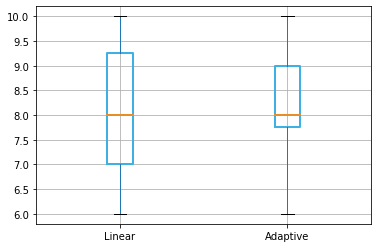

In [14]:
settings = {**boxplot_settings, "rot" : 0}
pd.DataFrame([FULL_LINEAR.median(), FULL_ADAPTIVE.median()]).transpose().rename(columns={0 : "Linear", 1: "Adaptive"}).boxplot(**settings)
plt.show()

# ALL DATA 
## TEST OF VARIANCE and HOMOGENITY 

In [38]:
linearSum = FULL_LINEAR.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
adaptiveSum =FULL_ADAPTIVE.apply(pd.Series.value_counts).fillna(0).sum(axis=1)

In [32]:
l = pd.DataFrame([FULL_LINEAR.median()])
a = pd.DataFrame([FULL_ADAPTIVE.median()])

a.mean(axis=1)
t.mean(axis=1)

0    8.125
dtype: float64

In [40]:
p = stats.levene(linearSum.dropna(), adaptiveSum.dropna()).pvalue
print("p = %.4f" % p)
print("p > a = %r" % (p > 0.05))
#If p < 0.05 then the assumption of homogenity between the two variances has been violated

p = 0.9493
p > a = True


In [44]:
[W_wo, p_wo] = stats.shapiro(linearSum.dropna())
[W_w, p_w] = stats.shapiro(adaptiveSum.dropna())


print(W_wo, p_wo)

print(W_w, p_w)

0.8567878007888794 0.0523109994828701
0.8710740208625793 0.08002415299415588


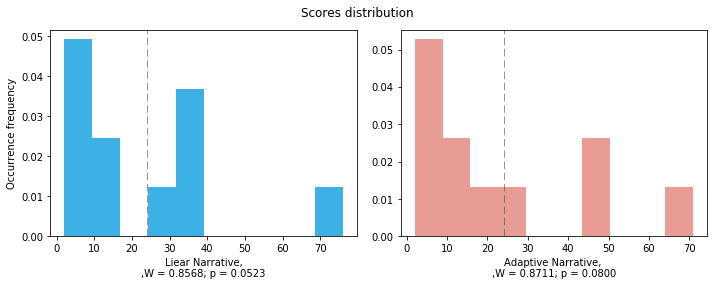

In [48]:
fig, (histC1, histC2) = plt.subplots(1, 2, figsize = (10,4))

histC1.hist(linearSum, density=True, bins=10, color="#3DB1E5")
histC1.set(xlabel="Liear Narrative,\n,W = %.4f; p = %.4f" % (W_wo, p_wo), ylabel="Occurrence frequency")
histC1.axvline(x=linearSum.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

histC2.hist(adaptiveSum, density=True, bins=10, color="#E99B96")
histC2.set(xlabel=f"Adaptive Narrative, \n,W = %.4f; p = %.4f" % (W_w, p_w))
histC2.axvline(x=adaptiveSum.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

plt.suptitle("Scores distribution")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

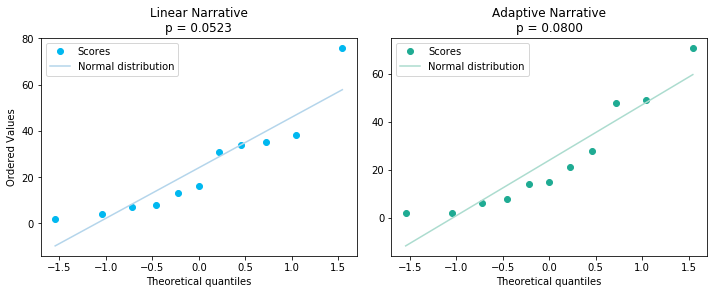

In [49]:
fig = plt.figure(figsize = (10, 4))

ax_wo = fig.add_subplot(121)
QQWithout = stats.probplot(linearSum.dropna(), plot=plt)
ax_wo.get_lines()[0].set_markerfacecolor("#00B8F0")
ax_wo.get_lines()[0].set_color("#00B8F0")
ax_wo.get_lines()[1].set_color("#B4D5EB")
ax_wo.set_title("Linear Narrative\np = %.4f" % p_wo)
ax_wo.legend(["Scores", "Normal distribution"])

ax_w = fig.add_subplot(122)
QQWith = stats.probplot(adaptiveSum.dropna(), plot=plt)
ax_w.get_lines()[0].set_markerfacecolor("#1FAB93")
ax_w.get_lines()[0].set_color("#1FAB93")
ax_w.get_lines()[1].set_color("#ACDCCF")
ax_w.set_title("Adaptive Narrative\np = %.4f" % p_w)
ax_w.set_ylabel("")
ax_w.legend(["Scores", "Normal distribution"])

plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

## T-TEST

In [60]:
# the method returns the value of the statistic (t) and the probability value (p)
t, p = stats.ttest_ind(linearSum, adaptiveSum)
print ('T-stat: %.4f' % t, '\np-value: %.4f' % p)


T-stat: 0.0000 
p-value: 1.0000


---

# BETWEEN-GROUP - FIRST TRY

In [108]:
responses1 = pd.read_excel("preprocseed_data.xlsx",sheet_name="first")

inversed=["Res is on a journey to become a fully operational robot","Res is on a journey to discover what happened in the past"]
responses1[inversed] = responses1[inversed].apply(reverse)


res_L_first = responses1.loc[responses1["ID1"].str.startswith("L")]
res_L_first = res_L_first.drop("ID1",1)
res_A_first = responses1.loc[responses1["ID1"].str.startswith("A")]
res_A_first = res_A_first.drop("ID1",1)

In [118]:
linFirstSum = res_L_first.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
adapFirstSum = res_A_first.apply(pd.Series.value_counts).fillna(0).sum(axis=1)


In [119]:
p = stats.levene(linFirstSum.dropna(), adapFirstSum.dropna()).pvalue
print("p = %.4f" % p)
print("p > a = %r" % (p > 0.05))
#If p < 0.05 then the assumption of homogenity between the two variances has been violated

p = 0.2868
p > a = True


In [120]:
[W_wo, p_wo] = stats.shapiro(linFirstSum.dropna())
[W_w, p_w] = stats.shapiro(adapFirstSum.dropna())


print(W_wo, p_wo)

print(W_w, p_w)

0.9055469036102295 0.21580111980438232
0.940747857093811 0.5293301939964294


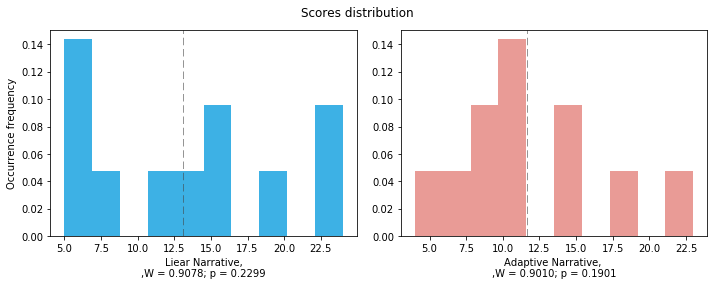

In [153]:
fig, (histC1, histC2) = plt.subplots(1, 2, figsize = (10,4))

histC1.hist(linFirstSum, density=True, bins=10, color="#3DB1E5")
histC1.set(xlabel="Liear Narrative,\n,W = %.4f; p = %.4f" % (W_wo, p_wo), ylabel="Occurrence frequency")
histC1.axvline(x=linFirstSum.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

histC2.hist(adapFirstSum, density=True, bins=10, color="#E99B96")
histC2.set(xlabel=f"Adaptive Narrative, \n,W = %.4f; p = %.4f" % (W_w, p_w))
histC2.axvline(x=adapFirstSum.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

plt.suptitle("Scores distribution")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

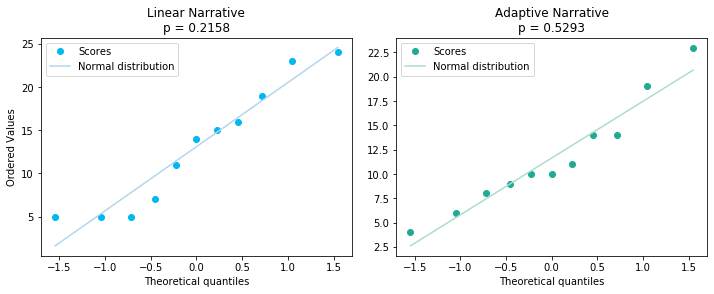

In [124]:
fig = plt.figure(figsize = (10, 4))

ax_wo = fig.add_subplot(121)
QQWithout = stats.probplot(linFirstSum.dropna(), plot=plt)
ax_wo.get_lines()[0].set_markerfacecolor("#00B8F0")
ax_wo.get_lines()[0].set_color("#00B8F0")
ax_wo.get_lines()[1].set_color("#B4D5EB")
ax_wo.set_title("Linear Narrative\np = %.4f" % p_wo)
ax_wo.legend(["Scores", "Normal distribution"])

ax_w = fig.add_subplot(122)
QQWith = stats.probplot(adapFirstSum.dropna(), plot=plt)
ax_w.get_lines()[0].set_markerfacecolor("#1FAB93")
ax_w.get_lines()[0].set_color("#1FAB93")
ax_w.get_lines()[1].set_color("#ACDCCF")
ax_w.set_title("Adaptive Narrative\np = %.4f" % p_w)
ax_w.set_ylabel("")
ax_w.legend(["Scores", "Normal distribution"])

plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

In [125]:
# the method returns the value of the statistic (t) and the probability value (p)
t, p = stats.ttest_ind(linFirstSum, adapFirstSum)
print ('T-stat: %.4f' % t, '\np-value: %.4f' % p)

T-stat: 0.5349 
p-value: 0.5986


---

# BETWEEN-GROUP - SECOND TRY


In [147]:
responses2 = pd.read_excel("preprocseed_data.xlsx",sheet_name="second")

inversed=["Res is on a journey to become a fully operational robot","Res is on a journey to discover what happened in the past"]
responses2[inversed] = responses2[inversed].apply(reverse)


res_L_second = responses2.loc[responses2["ID2"].str.startswith("L")]
res_L_second = res_L_second.drop("ID2",1)
res_A_second = responses2.loc[responses2["ID2"].str.startswith("A")]
res_A_second = res_A_second.drop("ID2",1)

In [148]:
linSecondSum = res_L_second.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
adapSecondSum = res_A_second.apply(pd.Series.value_counts).fillna(0).sum(axis=1)

In [149]:
p = stats.levene(linSecondSum.dropna(), adapSecondSum.dropna()).pvalue
print("p = %.4f" % p)
print("p > a = %r" % (p > 0.05))
#If p < 0.05 then the assumption of homogenity between the two variances has been violated

p = 0.4981
p > a = True


In [150]:
[W_wo, p_wo] = stats.shapiro(linSecondSum.dropna())
[W_w, p_w] = stats.shapiro(adapSecondSum.dropna())


print(W_wo, p_wo)

print(W_w, p_w)

0.9078444242477417 0.22991874814033508
0.9009991884231567 0.19011245667934418


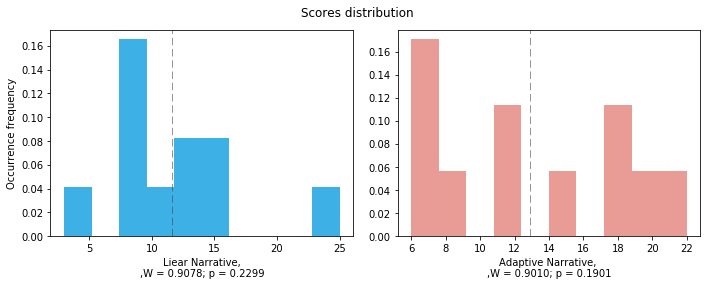

In [154]:
fig, (histC1, histC2) = plt.subplots(1, 2, figsize = (10,4))

histC1.hist(linSecondSum, density=True, bins=10, color="#3DB1E5")
histC1.set(xlabel="Liear Narrative,\n,W = %.4f; p = %.4f" % (W_wo, p_wo), ylabel="Occurrence frequency")
histC1.axvline(x=linSecondSum.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

histC2.hist(adapSecondSum, density=True, bins=10, color="#E99B96")
histC2.set(xlabel=f"Adaptive Narrative, \n,W = %.4f; p = %.4f" % (W_w, p_w))
histC2.axvline(x=adapSecondSum.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

plt.suptitle("Scores distribution")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

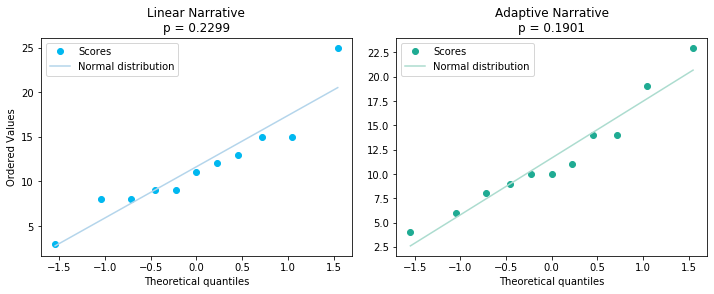

In [155]:
fig = plt.figure(figsize = (10, 4))

ax_wo = fig.add_subplot(121)
QQWithout = stats.probplot(linSecondSum.dropna(), plot=plt)
ax_wo.get_lines()[0].set_markerfacecolor("#00B8F0")
ax_wo.get_lines()[0].set_color("#00B8F0")
ax_wo.get_lines()[1].set_color("#B4D5EB")
ax_wo.set_title("Linear Narrative\np = %.4f" % p_wo)
ax_wo.legend(["Scores", "Normal distribution"])

ax_w = fig.add_subplot(122)
QQWith = stats.probplot(adapFirstSum.dropna(), plot=plt)
ax_w.get_lines()[0].set_markerfacecolor("#1FAB93")
ax_w.get_lines()[0].set_color("#1FAB93")
ax_w.get_lines()[1].set_color("#ACDCCF")
ax_w.set_title("Adaptive Narrative\np = %.4f" % p_w)
ax_w.set_ylabel("")
ax_w.legend(["Scores", "Normal distribution"])

plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

In [156]:
# the method returns the value of the statistic (t) and the probability value (p)
t, p = stats.ttest_ind(linSecondSum, adapSecondSum)
print ('T-stat: %.4f' % t, '\np-value: %.4f' % p)

T-stat: -0.5144 
p-value: 0.6126


# OLD CODE
---

# Compared change in feelings about the experience

The following graph displays the frequency of participants' change in feelings. Positive numbers are essentially stating, that the participant's experience was better while doing karaoke with our intervention, than it was while doing it without the intervention. Negative numbers, on the other hand state, that the participant enjoyed the without-version more.

This dataframe is calculated by summing up all ranked answers per person from both With and Without versions questionnaires and then comparing these values. If the participant has a higher overall score in the With version, it means that they have answered more positively to the questions about their experience.

In [33]:
differencesOverall = resWith.sum(axis=1) - resWithout.sum(axis=1)
differencesC1 = differencesOverall[C1]
differencesC2 = differencesOverall[C2]

differencesOverall.drop(["Bianka", "Christian"], inplace=True)
differencesC1.drop(["Bianka"], inplace=True)
differencesC2.drop(["Christian"], inplace=True)

mu = differencesOverall.mean()
variance = differencesOverall.var()
sigma = differencesOverall.std()
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="#E99B96")
plt.axvline(x=mu, color="#444444", lw=0.5).set_dashes([10, 5])
plt.hist(differencesOverall, density=True, bins=15, color="#3DB1E5")
plt.xlabel("Overall change in feelings about the experience per person")
plt.ylabel("Occurrence frequency")
plt.show()

NameError: name 'resWith' is not defined

## Consideration of relevance between the different condition order

As a part of the within-group experiment design, to remove some of the proposed bias threats, the participants were randomly allocated to the following two conditions:

- C1: Do karaoke *without* intervention, then do karaoke *with* intervention
- C2: Do karaoke *with* intervention, then do karaoke *without* intervention

To see, if there is any significant difference, we compare these two groups:

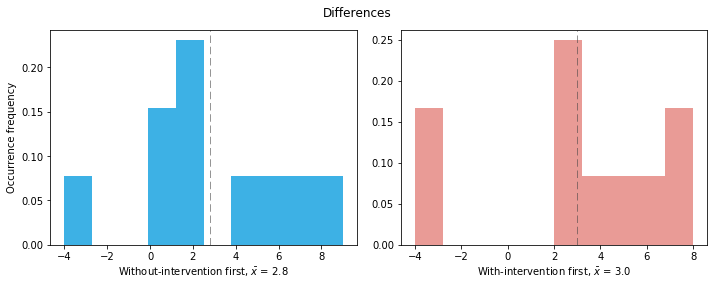

In [8]:
fig, (histC1, histC2) = plt.subplots(1, 2, figsize = (10,4))
meanSign = r"$\bar{x}$"

histC1.hist(differencesC1, density=True, bins=10, color="#3DB1E5")
histC1.set(xlabel=f"Without-intervention first, {meanSign} = {differencesC1.mean()}", ylabel="Occurrence frequency")
histC1.axvline(x=differencesC1.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

histC2.hist(differencesC2, density=True, bins=10, color="#E99B96")
histC2.set(xlabel=f"With-intervention first, {meanSign} = {differencesC2.mean()}")
histC2.axvline(x=differencesC2.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

plt.suptitle("Differences")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

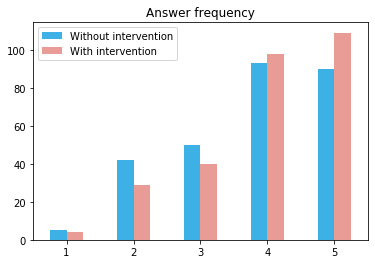

In [9]:
resWithSum = resWith.drop(["Bianka", "Christian"]).apply(pd.Series.value_counts).fillna(0)
resWithoutSum = resWithout.drop(["Bianka", "Christian"]).apply(pd.Series.value_counts).fillna(0)

fqAnswersWith = [int(resWithSum.iloc[x].sum()) for x in range(5)]
fqAnswersWithout = [int(resWithoutSum.iloc[x].sum()) for x in range(5)]

answersWith = pd.DataFrame({"Category" : list(range(1,6)), "Frequency" : fqAnswersWith})
answersWithout = pd.DataFrame({"Category" : list(range(1,6)), "Frequency" : fqAnswersWithout})

answers = pd.DataFrame({'Without intervention' : fqAnswersWithout, 'With intervention' : fqAnswersWith}, index=list(range(1,6)))
answers.plot.bar(title="Answer frequency", rot=0, color=("#3DB1E5", "#E99B96"))

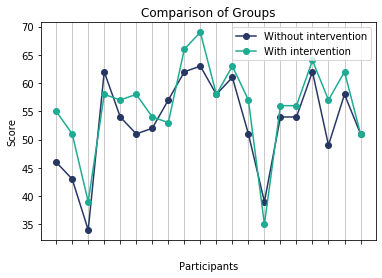

In [10]:
resWithoutCountSum = resWithout.drop(["Bianka", "Christian"]).sum(axis=1)
resWithCountSum = resWith.drop(["Bianka", "Christian"]).sum(axis=1)

plt.plot(resWithoutCountSum, 'o-', label="Without intervention", color="#273764")
plt.plot(resWithCountSum, 'o-', label='With intervention', color="#1FAB93")
plt.grid(axis='x', color="#999999", alpha=0.5, lw=1)
plt.xticks(color="#FFFFFF")
plt.xlabel('Participants')
plt.ylabel('Score')
plt.title('Comparison of Groups')
plt.legend()
plt.show()

In [11]:
print("%.2f" % answersWith.Frequency.var())
print("%.2f" % answersWithout.Frequency.var())

2065.50
1339.50


# Assumptions

## Variance criteria: Levene Test
- This control test tests the null hypothesis that all samples come from populations with equal variances. It returns the test statistic *W* and the probability value *p*.
- The variance criterion holds true when p > $\alpha$ (where $\alpha$ is the significance level, usually set to 0.05 (or 5%))

In [12]:
p = stats.levene(resWithoutCountSum.dropna(), resWithCountSum.dropna()).pvalue
print("p = %.4f" % p)
print("p > a = %r" % (p > 0.05))
#If p < 0.05 then the assumption of homogenity between the two variances has been violated

p = 0.6544
p > a = True


## Normality criteria: Shapiro-Wilk test and Q-Q plot
 - This control tests the null hypothesis that the data was drawn from a normal distribution and returns the test statistic *W* and the probability value *p*.
 - The normality criterion holds true when p > $\alpha$ (where $\alpha$ is the significance level, usually set to 0.05 (or 5%))

**Shapiro-Wilk test:**

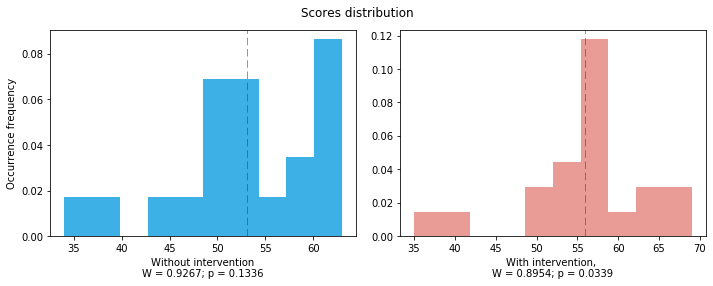

In [13]:
[W_wo, p_wo] = stats.shapiro(resWithoutCountSum.dropna())
[W_w, p_w] = stats.shapiro(resWithCountSum.dropna())

fig, (histC1, histC2) = plt.subplots(1, 2, figsize = (10,4))

histC1.hist(resWithoutCountSum, density=True, bins=10, color="#3DB1E5")
histC1.set(xlabel="Without intervention\nW = %.4f; p = %.4f" % (W_wo, p_wo), ylabel="Occurrence frequency")
histC1.axvline(x=resWithoutCountSum.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

histC2.hist(resWithCountSum, density=True, bins=10, color="#E99B96")
histC2.set(xlabel=f"With intervention, \nW = %.4f; p = %.4f" % (W_w, p_w))
histC2.axvline(x=resWithCountSum.mean(), color="#444444", alpha=0.75, lw=0.75).set_dashes([10, 5])

plt.suptitle("Scores distribution")
plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

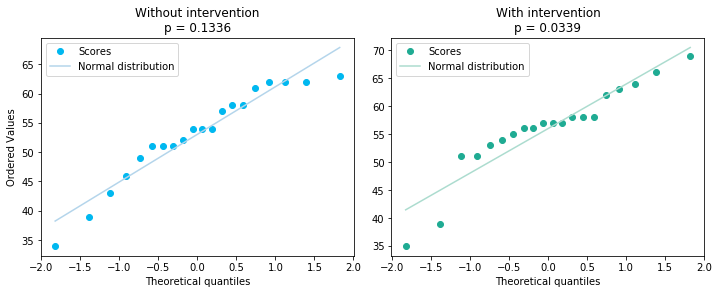

In [33]:
fig = plt.figure(figsize = (10, 4))

ax_wo = fig.add_subplot(121)
QQWithout = stats.probplot(resWithoutCountSum.dropna(), plot=plt)
ax_wo.get_lines()[0].set_markerfacecolor("#00B8F0")
ax_wo.get_lines()[0].set_color("#00B8F0")
ax_wo.get_lines()[1].set_color("#B4D5EB")
ax_wo.set_title("Without intervention\np = %.4f" % p_wo)
ax_wo.legend(["Scores", "Normal distribution"])

ax_w = fig.add_subplot(122)
QQWith = stats.probplot(resWithCountSum.dropna(), plot=plt)
ax_w.get_lines()[0].set_markerfacecolor("#1FAB93")
ax_w.get_lines()[0].set_color("#1FAB93")
ax_w.get_lines()[1].set_color("#ACDCCF")
ax_w.set_title("With intervention\np = %.4f" % p_w)
ax_w.set_ylabel("")
ax_w.legend(["Scores", "Normal distribution"])

plt.tight_layout(pad=1, w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(top=0.9)

plt.show()

The probability value for group without intervention is well over 0.05 and therefore the distribution can be safely considered as normal. For the group with intervention, the probability value is less than 0.05 and it is visible, that the distribution is not normal with all the scores. However, since we are dealing with a small sample size and 3,39% is not radically different from 5%, we will treat both datasets as normally distributed.

# T-Test

**$H_0$:** There is no statistically significant difference between the population (i.e. without intervention) and the chosen sample (i.e. with intervention)

The null hypothesis is to be rejected, if the probability value of the T-test is smaller than the significance level $\alpha$: 0.05

In [37]:
# the method returns the value of the statistic (t) and the probability value (p)
t, p = stats.ttest_ind(resWithoutCountSum.dropna(), resWithCountSum.dropna())
print ('T-stat: %.4f' % t, '\np-value: %.4f' % p)

T-stat: -1.1449 
p-value: 0.2594


**Since p < a (0.05) we say that the null hypothesis is rejected and suggest an alternative: **
**There is a statistically significant difference between the population (i.e. without intervention) and the chosen sample (i.e. with intervention). With that being said,**

## The intervention has an effect on the users' karaoke experience.